In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sqlite3 as lite

In [15]:
def get_timeseries(in_list, duration, kg_to_tons):
    """returns a timeseries list from in_list data.

    Parameters
    ----------
    in_list: list
        list of data to be created into timeseries
        list[0] = time
        list[1] = value, quantity
    duration: int
        duration of the simulation
    kg_to_tons: bool
        if True, list returned has units of tons
        if False, list returned as units of kilograms

    Returns
    -------
    timeseries list of commodities stored in in_list
    """
    value = 0
    value_timeseries = []
    array = np.array(in_list)
    if len(in_list) > 0:
        for i in range(0, duration):
            value = sum(array[array[:, 0] == i][:, 1])
            if kg_to_tons:
                value_timeseries.append(value * 0.001)
            else:
                value_timeseries.append(value)
    return value_timeseries

In [20]:
info = cur.execute('SELECT initialyear, initialmonth, '
                   'duration FROM info').fetchone()
init_year = info['initialyear']
init_month = info['initialmonth']
duration = info['duration']
timestep = np.linspace(0, duration - 1, num=duration)


In [21]:
con = lite.connect('./cyclus.sqlite')
con.row_factory = lite.Row
cur = con.cursor()

In [22]:
# get agentid 
sink_agentid = cur.execute('SELECT agentid FROM agententry WHERE prototype = "SomeSink"').fetchone()[0]
fill_source_agentid = cur.execute('SELECT agentid FROM agententry WHERE prototype = "fill_source"').fetchone()[0]
print(sink_agentid)
print(fill_source_agentid)

17
16


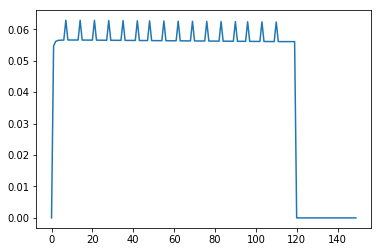

In [24]:
waste_flux = cur.execute('SELECT time, quantity FROM transactions ' 
                         'INNER JOIN resources on resources.resourceid = transactions.resourceid '
                         'WHERE receiverid = 17 and commodity = "waste"').fetchall()
waste_flux = get_timeseries(waste_flux, duration, True)
plt.plot(waste_flux)

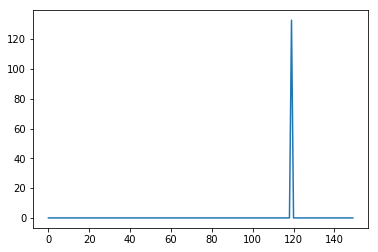

In [25]:
fuel_out = cur.execute('SELECT time, quantity FROM transactions ' 
                         'INNER JOIN resources on resources.resourceid = transactions.resourceid '
                         'WHERE receiverid = 17 and commodity = "fuel_out"').fetchall()
fuel_out = get_timeseries(fuel_out, duration, True)
plt.plot(fuel_out)

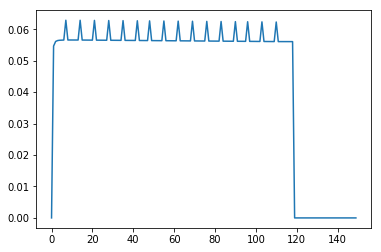

In [26]:
fill_in = cur.execute('SELECT time, quantity FROM transactions ' 
                         'INNER JOIN resources on resources.resourceid = transactions.resourceid '
                         'WHERE senderid = 16 and commodity = "fill"').fetchall()
fill_in = get_timeseries(fill_in, duration, True)
plt.plot(fill_in)